# Import Necessary Modules/Packages

In [34]:
#import GPy
import numpy as np
import math # math operation
from matplotlib import pyplot as plt # make plot
#import random
from tqdm import tqdm
import timeit
import copy
%matplotlib inline
%load_ext autoreload
from sklearn.metrics import confusion_matrix
from scipy.stats import norm
import pickle
import itertools
import pandas as pd
from sklearn import metrics

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
filename = 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
df = pd.read_csv(filename) 
df.tail()
X = df.to_numpy()[:,1:]
y = df.to_numpy()[:,0]
from sklearn.model_selection import train_test_split
r = 1 - 0.7073
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=r, random_state = 123)




In [36]:
def to_df(file_dic, keys):
  data = {'Naive Average':None, 'Adjusted Prior':None, 'Spatial Method':None}
  #keys = ["naiveAvg",'adjPrior','spa']

  for key1, key2, key3 in zip(data, file_dic, keys):
    time = round(file_dic[key2][key3]['time'],2)
    tn, fp, fn, tp = file_dic[key2][key3]['confusion']
    fpr = round(fp/(fp + tn) *100,2)
    fnr = round(fn/(fn + tp) *100,2)
    mcr = round((fp + fn)/ (tn + fp + fn + tp) *100,2)
    data[key1] = [time, mcr, fpr, fnr]

  df = pd.DataFrame(data,index=row_index)
  return df

In [37]:
def flatten(x):
  epty = np.array([])

  for i in range(len(x)):
    if i == 0:
      comb = np.append(epty, x[i])
    else:
      comb = np.append(comb, x[i])
  return comb


def sorted_bmi__x_y(x,y):
    test_x = copy.deepcopy(x)
    test_y = copy.deepcopy(y)
    ind = np.argsort(test_x[:,3])
    test_x_sorted = test_x[ind]
    test_y_sorted = test_y[ind]
    return test_x_sorted, test_y_sorted

def draw_ROC(file_dic, keys, k, sep = True):
  #keys = ["naiveAvg",'adjPrior','spa']
  color = ['g', 'b', 'r']
  linewidth = 0.4
  for key1, key2, col in zip(file_dic, keys, color):
    if (key2 == "spa") |(key2 == "spa2")|(key2 == "spa3"): 

      p_flatten_spa_container = file_dic[key1][key2]['p']
      p_flatten_all = flatten(p_flatten_spa_container)


      testy_container = []
      uniq_lst = np.unique(X_test[:,k])
      for i in uniq_lst:
        test_y_spa = y_test[np.where(X_test[:,k] == i)].reshape(-1)
        test_x_spa = X_test[np.where(X_test[:,k] == i)]
        test_x_spa, test_y_spa = sorted_bmi__x_y(test_x_spa, test_y_spa)
        testy_container.append(test_y_spa)
      y_flatten_all = flatten(testy_container)
      fpr, tpr, thresholds = metrics.roc_curve(y_flatten_all, p_flatten_all, pos_label=1)
     

    else:
      p = file_dic[key1][key2]['p']
      print(f"len p {len(p)}; len y_test {len(y_test)}")
      fpr, tpr, thresholds = metrics.roc_curve(y_test, p, pos_label=1)
    if sep: 
      plt.plot(fpr, tpr, color = col, label = key1, linewidth = linewidth)
      plt.plot(np.linspace(0,1, 100), np.linspace(0,1, 100), color = 'k', label = 'Baseline', linewidth = linewidth)

      plt.xlabel('FPR(%)')
      plt.ylabel('TPR(%)')
      plt.title(key2)
      plt.legend()
      plt.show() 
    else:
      plt.plot(fpr, tpr, color = col, label = key1, linewidth = linewidth)
      

  if not sep:
    plt.xlabel('FPR(%)')
    plt.ylabel('TPR(%)')
    plt.title("ROC curves")
    plt.plot(np.linspace(0,1, 100), np.linspace(0,1, 100), color = 'k', label = 'Baseline',linewidth=linewidth)
    plt.legend()
    plt.show() 


def draw_ROC_2(file_dic, keys, klst, sep = True):
  #keys = ["naiveAvg",'adjPrior','spa']
  color = ['g', 'b', 'r','y']
  linewidth = 0.4
  for key1, key2, col, k in zip(file_dic, keys, color, klst):
    if (key2 == "spa") |(key2 == "spa2")|(key2 == "spa3"): 

      p_flatten_spa_container = file_dic[key1][key2]['p']
      p_flatten_all = flatten(p_flatten_spa_container)


      testy_container = []
      uniq_lst = np.unique(X_test[:,k])
      for i in uniq_lst:
        test_y_spa = y_test[np.where(X_test[:,k] == i)].reshape(-1)
        test_x_spa = X_test[np.where(X_test[:,k] == i)]
        test_x_spa, test_y_spa = sorted_bmi__x_y(test_x_spa, test_y_spa)
        testy_container.append(test_y_spa)
      y_flatten_all = flatten(testy_container)
      fpr, tpr, thresholds = metrics.roc_curve(y_flatten_all, p_flatten_all, pos_label=1)
     

    else:
      p = file_dic[key1][key2]['p']
      print(f"len p {len(p)}; len y_test {len(y_test)}")
      fpr, tpr, thresholds = metrics.roc_curve(y_test, p, pos_label=1)
    if sep: 
      plt.plot(fpr, tpr, color = col, label = key1, linewidth = linewidth)
      plt.plot(np.linspace(0,1, 100), np.linspace(0,1, 100), color = 'k', label = 'Baseline', linewidth = linewidth)

      plt.xlabel('FPR(%)')
      plt.ylabel('TPR(%)')
      plt.title(key2)
      plt.legend()
      plt.show() 
    else:
      plt.plot(fpr, tpr, color = col, label = key1, linewidth = linewidth)
      

  if not sep:
    plt.xlabel('FPR(%)')
    plt.ylabel('TPR(%)')
    plt.title(f"ROC curves: {key2}")
    plt.plot(np.linspace(0,1, 100), np.linspace(0,1, 100), color = 'k', label = 'Baseline',linewidth=linewidth)
    plt.legend()
    plt.show() 

# Result 1 (m = 40)

## tb

In [38]:
filename = ['rslt_naiveAvg_csdy40.pickle', "rslt_adjPrior_csdy40.pickle",'rslt_spa_csdy40.pickle']
file_dic = {'Naive Average':None, 'Adjusted Prior':None, 'Spatial Method':None}

for i, key in zip(range(3),file_dic):
  with open(filename[i], "rb") as f:
      dictname = pickle.load(f)
      print(f"key is {key}; filename is {filename[i]}")
      file_dic[key] = dictname

key is Naive Average; filename is rslt_naiveAvg_csdy40.pickle
key is Adjusted Prior; filename is rslt_adjPrior_csdy40.pickle
key is Spatial Method; filename is rslt_spa_csdy40.pickle


In [39]:
row_index = ['Time (sec)', 'MCR (%)', 'FNR (%)', 'FPR (%)']

In [40]:
keys = ["naiveAvg",'adjPrior','spa']
df = to_df(file_dic = file_dic, keys = keys)

In [41]:
print(df.to_latex(index=True)) 

\begin{tabular}{lrrr}
\toprule
{} &  Naive Average &  Adjusted Prior &  Spatial Method \\
\midrule
Time (sec) &        5840.08 &         6096.35 &         6918.75 \\
MCR (\%)    &          24.99 &           24.67 &           25.68 \\
FNR (\%)    &          28.87 &           30.00 &           30.38 \\
FPR (\%)    &          21.04 &           19.24 &           20.90 \\
\bottomrule
\end{tabular}



## ROC

len p 20692; len y_test 20692
len p 20692; len y_test 20692


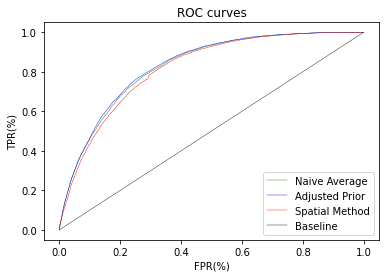

In [42]:
draw_ROC(file_dic = file_dic, k =0,  keys = keys, sep = False)

# Result 2 (m = 25)

## tb

In [43]:
filename = ['rslt_naiveAvg_csdy25.pickle', "rslt_adjPrior_csdy25.pickle",'rslt_spa_csdy25.pickle']
file_dic = {'Naive Average':None, 'Adjusted Prior':None, 'Spatial Method':None}

for i, key in zip(range(3),file_dic):
  with open(filename[i], "rb") as f:
      dictname = pickle.load(f)
      print(f"key is {key}; filename is {filename[i]}")
      file_dic[key] = dictname

key is Naive Average; filename is rslt_naiveAvg_csdy25.pickle
key is Adjusted Prior; filename is rslt_adjPrior_csdy25.pickle
key is Spatial Method; filename is rslt_spa_csdy25.pickle


In [44]:
row_index = ['Time (sec)', 'MCR (%)', 'FNR (%)', 'FPR (%)']

In [45]:
keys = ["naiveAvg",'adjPrior','spa']
df = to_df(file_dic = file_dic, keys = keys)

In [46]:
print(df.to_latex(index=True)) 

\begin{tabular}{lrrr}
\toprule
{} &  Naive Average &  Adjusted Prior &  Spatial Method \\
\midrule
Time (sec) &        9385.05 &         9700.07 &        11098.01 \\
MCR (\%)    &          24.90 &           24.68 &           24.98 \\
FNR (\%)    &          28.69 &           29.41 &           30.00 \\
FPR (\%)    &          21.05 &           19.87 &           19.87 \\
\bottomrule
\end{tabular}



## ROC 2 

len p 20692; len y_test 20692
len p 20692; len y_test 20692


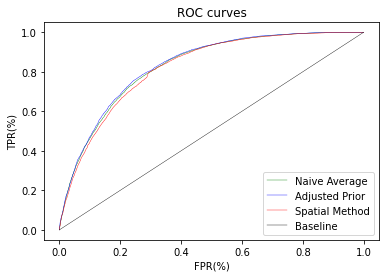

In [47]:
draw_ROC(file_dic = file_dic, k =13,  keys = keys, sep = False)

# Result 3 (m = 100)

## tb

In [48]:
filename = ['rslt_naiveAvg_csdy100.pickle', "rslt_adjPrior_csdy100.pickle",'rslt_spa_csdy100.pickle']
file_dic = {'Naive Average':None, 'Adjusted Prior':None, 'Spatial Method':None}

for i, key in zip(range(3),file_dic):
  with open(filename[i], "rb") as f:
      dictname = pickle.load(f)
      print(f"key is {key}; filename is {filename[i]}")
      file_dic[key] = dictname

key is Naive Average; filename is rslt_naiveAvg_csdy100.pickle
key is Adjusted Prior; filename is rslt_adjPrior_csdy100.pickle
key is Spatial Method; filename is rslt_spa_csdy100.pickle


In [49]:
row_index = ['Time (sec)', 'MCR (%)', 'FNR (%)', 'FPR (%)']

In [50]:
keys = ["naiveAvg",'adjPrior','spa']
df = to_df(file_dic = file_dic, keys = keys)

In [51]:
print(df.to_latex(index=True)) 

\begin{tabular}{lrrr}
\toprule
{} &  Naive Average &  Adjusted Prior &  Spatial Method \\
\midrule
Time (sec) &        2752.90 &         2801.05 &         3562.38 \\
MCR (\%)    &          25.20 &           24.80 &           26.06 \\
FNR (\%)    &          29.42 &           31.43 &           31.43 \\
FPR (\%)    &          20.92 &           18.06 &           20.61 \\
\bottomrule
\end{tabular}



## ROC 2 

In [52]:
file_dic.keys()

dict_keys(['Naive Average', 'Adjusted Prior', 'Spatial Method'])

In [53]:
len(file_dic['Adjusted Prior']['adjPrior']['p'])

20692

len p 20692; len y_test 20692
len p 20692; len y_test 20692


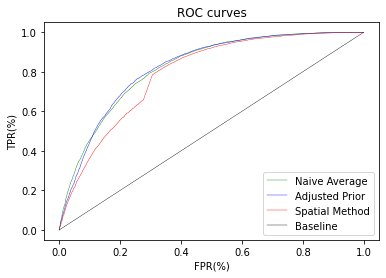

In [54]:
draw_ROC(file_dic = file_dic, k =13,  keys = keys, sep = False)

# Result 4 (m = 200)

## tb

In [55]:
filename = ['rslt_naiveAvg_csdy200.pickle', "rslt_adjPrior_csdy200.pickle",'rslt_spa_csdy200.pickle']
file_dic = {'Naive Average':None, 'Adjusted Prior':None, 'Spatial Method':None}

for i, key in zip(range(3),file_dic):
  with open(filename[i], "rb") as f:
      dictname = pickle.load(f)
      print(f"key is {key}; filename is {filename[i]}")
      file_dic[key] = dictname

key is Naive Average; filename is rslt_naiveAvg_csdy200.pickle
key is Adjusted Prior; filename is rslt_adjPrior_csdy200.pickle
key is Spatial Method; filename is rslt_spa_csdy200.pickle


In [56]:
row_index = ['Time (sec)', 'MCR (%)', 'FNR (%)', 'FPR (%)']

In [57]:
keys = ["naiveAvg",'adjPrior','spa']
df = to_df(file_dic = file_dic, keys = keys)

In [58]:
print(df.to_latex(index=True)) 

\begin{tabular}{lrrr}
\toprule
{} &  Naive Average &  Adjusted Prior &  Spatial Method \\
\midrule
Time (sec) &        2008.62 &         2027.55 &         2857.27 \\
MCR (\%)    &          25.91 &           25.48 &           27.26 \\
FNR (\%)    &          31.06 &           36.53 &           31.99 \\
FPR (\%)    &          20.67 &           14.24 &           22.45 \\
\bottomrule
\end{tabular}



## ROC 2 

In [59]:
p_flatten_spa_container = file_dic['Spatial Method']['spa']['p']
p_flatten_spa_container


epty = np.array([])

for i in range(len(p_flatten_spa_container)):
  if i == 0:
    comb = np.append(epty, p_flatten_spa_container[i])
  else:
    comb = np.append(comb, p_flatten_spa_container[i])

print(len(comb))

20692


len p 20692; len y_test 20692
len p 20692; len y_test 20692


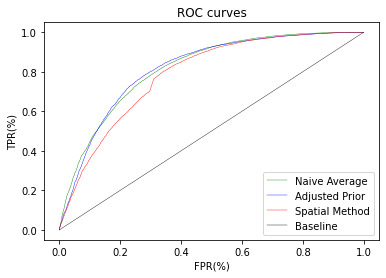

In [60]:
draw_ROC(file_dic = file_dic, k = 20,  keys = keys, sep = False)

# Naive average wrpt the nubmer of machine

In [61]:
filename = ['rslt_naiveAvg_csdy25.pickle', "rslt_naiveAvg_csdy40.pickle",'rslt_naiveAvg_csdy100.pickle','rslt_naiveAvg_csdy200.pickle']
file_dic = {'m = 25':None, 'm = 40':None,'m = 100':None,'m = 200':None,}
keys = ["naiveAvg","naiveAvg","naiveAvg","naiveAvg",]


for i, key in zip(range(4),file_dic):
  with open(filename[i], "rb") as f:
      dictname = pickle.load(f)
      print(f"key is {key}; filename is {filename[i]}")
      file_dic[key] = dictname

key is m = 25; filename is rslt_naiveAvg_csdy25.pickle
key is m = 40; filename is rslt_naiveAvg_csdy40.pickle
key is m = 100; filename is rslt_naiveAvg_csdy100.pickle
key is m = 200; filename is rslt_naiveAvg_csdy200.pickle


len p 20692; len y_test 20692
len p 20692; len y_test 20692
len p 20692; len y_test 20692
len p 20692; len y_test 20692


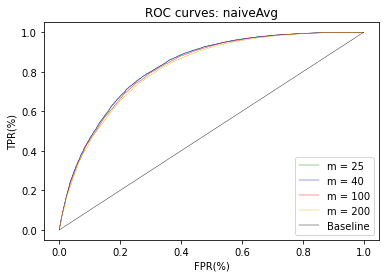

In [62]:
draw_ROC_2(file_dic = file_dic, klst = [13, 0 , 13, 20],  keys = keys, sep = False)

# Adj prior wrpt the nubmer of machine

In [63]:
filename = ['rslt_adjPrior_csdy25.pickle', "rslt_adjPrior_csdy40.pickle",'rslt_adjPrior_csdy100.pickle','rslt_adjPrior_csdy200.pickle']
file_dic = {'m = 25':None, 'm = 40':None,'m = 100':None,'m = 200':None,}
keys = ["adjPrior","adjPrior","adjPrior","adjPrior",]


for i, key in zip(range(4),file_dic):
  with open(filename[i], "rb") as f:
      dictname = pickle.load(f)
      print(f"key is {key}; filename is {filename[i]}")
      file_dic[key] = dictname


      

key is m = 25; filename is rslt_adjPrior_csdy25.pickle
key is m = 40; filename is rslt_adjPrior_csdy40.pickle
key is m = 100; filename is rslt_adjPrior_csdy100.pickle
key is m = 200; filename is rslt_adjPrior_csdy200.pickle


len p 20692; len y_test 20692
len p 20692; len y_test 20692
len p 20692; len y_test 20692
len p 20692; len y_test 20692


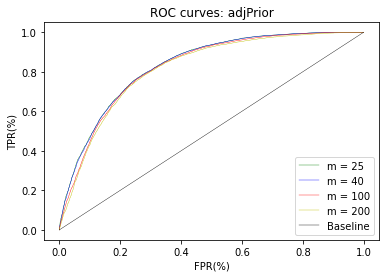

In [64]:
draw_ROC_2(file_dic = file_dic, klst = [13, 0 , 13, 20],  keys = keys, sep = False)

# Spatial method wrpt the nubmer of machine

In [65]:
filename = ['rslt_spa_csdy25.pickle', "rslt_spa_csdy40.pickle",'rslt_spa_csdy100.pickle','rslt_spa_csdy200.pickle']
file_dic = {'m = 25':None, 'm = 40':None,'m = 100':None,'m = 200':None,}
keys = ["spa","spa","spa","spa",]


for i, key in zip(range(4),file_dic):
  with open(filename[i], "rb") as f:
      dictname = pickle.load(f)
      print(f"key is {key}; filename is {filename[i]}")
      file_dic[key] = dictname

key is m = 25; filename is rslt_spa_csdy25.pickle
key is m = 40; filename is rslt_spa_csdy40.pickle
key is m = 100; filename is rslt_spa_csdy100.pickle
key is m = 200; filename is rslt_spa_csdy200.pickle


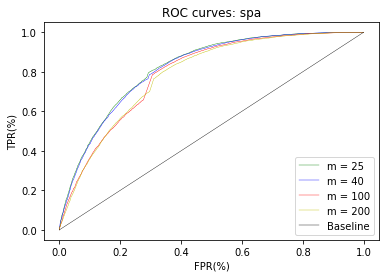

In [66]:
draw_ROC_2(file_dic = file_dic, klst = [13, 0 , 13, 20],  keys = keys, sep = False)